In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm


In [4]:
data = pd.read_excel('https://www.oliviergueant.com/uploads/4/3/0/9/4309511/sbf120_as_of_end_2018.xlsx', sheet_name = 'Data')

In [5]:
data

,QDT FP Equity,PX_LAST,MARKETCAP,DIM FP Equity,PX_LAST.1,MARKETCAP.1,RUI FP Equity,PX_LAST.2,MARKETCAP.2,OR FP Equity,...,MARKETCAP.116,ATE FP Equity,PX_LAST.117,MARKETCAP.117,WLN FP Equity,PX_LAST.118,MARKETCAP.118,NXI FP Equity,PX_LAST.119,MARKETCAP.119
0,40543,65.20,2074.1424,40543,6.28,640.6889,40543,21.1225,1224.8148,40543,...,7045.2320,40543,24.585,785.1392,41816.0,16.4,NaN,40543,26.4957,1770.6669
1,40546,65.41,2080.8229,40546,6.29,641.5386,40546,21.3261,1236.6203,40546,...,7356.5732,40546,24.700,788.8118,41817.0,16.4,2160.9760,40546,26.8603,1795.0327
2,40547,66.54,2116.7705,40547,6.28,640.6889,40547,21.3770,1239.5716,40547,...,7370.2285,40547,25.090,801.2667,41820.0,16.6,2187.3294,40547,27.2288,1819.6576
3,40548,66.51,2115.8161,40548,6.29,641.3687,40548,21.6896,1257.7014,40548,...,7544.1062,40548,25.000,798.3925,41821.0,16.4,2160.9760,40548,27.1047,1811.3629
4,40549,67.56,2149.2187,40549,6.30,642.3883,40549,21.6920,1257.8420,40549,...,7652.4383,40549,25.450,812.7636,41822.0,16.3,2147.7993,40549,27.1861,1816.8063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729,44440,23.72,819.8323,44440,524.20,48320.8556,44440,33.2700,3459.1215,44440,...,34554.1988,44440,138.700,4765.8506,NaN,NaN,NaN,44440,43.5800,2446.1334
2730,44441,23.76,821.2148,44441,532.60,49095.1692,44441,33.2000,3451.8435,44441,...,34567.8674,44441,139.900,4807.0836,NaN,NaN,NaN,44441,43.3600,2433.7848
2731,44442,23.28,804.6246,44442,531.00,48947.6809,44442,32.9700,3427.9301,44442,...,34535.9740,44442,139.800,4803.6475,NaN,NaN,NaN,44442,43.6600,2450.6237
2732,44445,22.80,788.0344,44445,542.40,49998.5351,44445,33.0000,3431.0493,44445,...,34804.7896,44445,138.700,4765.8506,NaN,NaN,NaN,44445,43.6200,2448.3786


In [6]:
%%time

price_df_list = []
for i in tqdm(range(120)):
    price_data = data.iloc[:,3*i:3*i+2].copy()
    price_data.dropna(inplace=True)
    price_data.iloc[:,0] = pd.to_datetime(price_data.iloc[:,0], unit= 'D', origin= '1899-12-30')
    price_data.rename(columns = {price_data.columns[0] : 'Date', price_data.columns[1]: price_data.columns[0]}, inplace = True)
    price_data.set_index('Date', inplace = True)
    price_df_list.append(price_data)

agg_price_data = price_df_list[0]
for df in tqdm(price_df_list[1:]):
    agg_price_data = agg_price_data.join(df, how='outer', sort = True)

agg_price_data = agg_price_data[(agg_price_data.index >= '31/12/2018') & (agg_price_data.index <= '31/12/2020')]

100%|██████████| 119/119 [00:00<00:00, 447.92it/s]

CPU times: total: 234 ms
Wall time: 580 ms



<timed exec>:14: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.


In [7]:
agg_price_data

,QDT FP Equity,DIM FP Equity,RUI FP Equity,OR FP Equity,DG FP Equity,ALD FP Equity,URW NA Equity,KORI FP Equity,TTE FP Equity,DSY FP Equity,...,ATO FP Equity,MDM FP Equity,AKE FP Equity,MERY FP Equity,RI FP Equity,RCO FP Equity,STM FP Equity,ATE FP Equity,WLN FP Equity,NXI FP Equity
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,23.82,87.35,46.88,201.20,72.02,10.40,135.40,28.7069,46.180,20.740,...,54.0516,16.71,74.96,11.970,143.30,98.2205,12.485,72.70,42.20,39.40
2019-01-02,23.80,85.90,47.76,199.60,71.44,10.25,132.62,27.9126,46.655,20.570,...,54.2785,16.89,74.38,12.070,141.20,97.0790,12.145,72.45,41.62,38.48
2019-01-03,24.60,83.30,46.72,197.20,71.20,10.15,133.30,28.0050,46.255,19.256,...,51.4050,17.07,73.66,12.120,138.95,94.0515,10.735,70.25,39.00,38.28
2019-01-04,24.08,86.05,47.96,200.00,72.58,10.71,138.12,28.5222,47.410,20.010,...,53.2954,16.50,77.86,12.430,141.10,98.1709,10.905,72.45,39.70,38.50
2019-01-07,24.80,85.85,48.66,197.45,72.22,10.81,137.32,29.0764,47.300,20.400,...,52.7359,17.48,78.16,12.440,138.65,97.0790,11.350,73.65,38.92,38.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,16.03,292.60,37.94,302.30,82.36,11.54,65.62,30.7000,35.890,32.670,...,74.9800,15.02,94.42,7.370,157.75,152.5000,29.990,93.20,77.16,35.70
2020-12-28,16.36,293.00,38.14,309.10,83.84,11.56,65.42,30.4400,35.855,33.560,...,75.3000,15.08,95.36,7.205,159.00,154.4000,30.420,93.35,77.46,35.48
2020-12-29,16.02,295.60,38.26,312.20,83.12,11.72,65.52,30.8000,35.770,33.370,...,75.7600,15.11,95.20,7.470,161.05,159.6000,30.140,94.15,79.42,35.82


In [8]:
for ticker in tqdm(agg_price_data.columns):
    series = agg_price_data[ticker]
    first = series.first_valid_index()
    last = series.last_valid_index()
    series_real = series[(series.index >= first) & (series.index <= last)].fillna(method = 'bfill')
    agg_price_data[ticker][(agg_price_data[ticker].index >= first) & (agg_price_data[ticker].index <= last)] = series_real

100%|██████████| 120/120 [00:00<00:00, 1280.33it/s]


In [9]:
for ticker in tqdm(agg_price_data.columns):
    if agg_price_data[ticker].isnull().values.any():
        print(ticker)
        nulls = agg_price_data[ticker].isnull()
        print(nulls[nulls == True].index)

100%|██████████| 120/120 [00:00<00:00, 14983.22it/s]

GTO NA Equity
DatetimeIndex(['2019-05-29', '2019-05-30', '2019-05-31', '2019-06-03',
               '2019-06-04', '2019-06-05', '2019-06-06', '2019-06-07',
               '2019-06-10', '2019-06-11',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=410, freq=None)
ING FP Equity
DatetimeIndex(['2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12',
               '2020-11-13', '2020-11-16', '2020-11-17', '2020-11-18',
               '2020-11-19', '2020-11-20', '2020-11-23', '2020-11-24',
               '2020-11-25', '2020-11-26', '2020-11-27', '2020-11-30',
               '2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
               '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10',
               '2020-12-11', '2020-12-14', '2020-12-15', '2020-12-16',
           

In [10]:
(agg_price_data - agg_price_data.shift(1))/agg_price_data.shift(1)

,QDT FP Equity,DIM FP Equity,RUI FP Equity,OR FP Equity,DG FP Equity,ALD FP Equity,URW NA Equity,KORI FP Equity,TTE FP Equity,DSY FP Equity,...,ATO FP Equity,MDM FP Equity,AKE FP Equity,MERY FP Equity,RI FP Equity,RCO FP Equity,STM FP Equity,ATE FP Equity,WLN FP Equity,NXI FP Equity
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,-0.000840,-0.016600,0.018771,-0.007952,-0.008053,-0.014423,-0.020532,-0.027669,0.010286,-0.008197,...,0.004198,0.010772,-0.007737,0.008354,-0.014655,-0.011622,-0.027233,-0.003439,-0.013744,-0.023350
2019-01-03,0.033613,-0.030268,-0.021776,-0.012024,-0.003359,-0.009756,0.005127,0.003310,-0.008574,-0.063879,...,-0.052940,0.010657,-0.009680,0.004143,-0.015935,-0.031186,-0.116097,-0.030366,-0.062951,-0.005198
2019-01-04,-0.021138,0.033013,0.026541,0.014199,0.019382,0.055172,0.036159,0.018468,0.024970,0.039157,...,0.036775,-0.033392,0.057019,0.025578,0.015473,0.043799,0.015836,0.031317,0.017949,0.005747
2019-01-07,0.029900,-0.002324,0.014595,-0.012750,-0.004960,0.009337,-0.005792,0.019430,-0.002320,0.019490,...,-0.010498,0.059394,0.003853,0.000805,-0.017364,-0.011122,0.040807,0.016563,-0.019647,-0.003636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,-0.004966,0.004118,-0.000527,-0.004610,-0.006753,-0.003454,0.009538,0.005898,0.000697,-0.010000,...,-0.003191,-0.001330,-0.004638,0.022191,0.003499,0.000000,-0.011536,0.000000,0.002338,0.000561
2020-12-28,0.020586,0.001367,0.005271,0.022494,0.017970,0.001733,-0.003048,-0.008469,-0.000975,0.027242,...,0.004268,0.003995,0.009956,-0.022388,0.007924,0.012459,0.014338,0.001609,0.003888,-0.006162
2020-12-29,-0.020782,0.008874,0.003146,0.010029,-0.008588,0.013841,0.001529,0.011827,-0.002371,-0.005662,...,0.006109,0.001989,-0.001678,0.036780,0.012893,0.033679,-0.009204,0.008570,0.025303,0.009583


In [11]:
agg_price_data.pct_change()

,QDT FP Equity,DIM FP Equity,RUI FP Equity,OR FP Equity,DG FP Equity,ALD FP Equity,URW NA Equity,KORI FP Equity,TTE FP Equity,DSY FP Equity,...,ATO FP Equity,MDM FP Equity,AKE FP Equity,MERY FP Equity,RI FP Equity,RCO FP Equity,STM FP Equity,ATE FP Equity,WLN FP Equity,NXI FP Equity
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,-0.000840,-0.016600,0.018771,-0.007952,-0.008053,-0.014423,-0.020532,-0.027669,0.010286,-0.008197,...,0.004198,0.010772,-0.007737,0.008354,-0.014655,-0.011622,-0.027233,-0.003439,-0.013744,-0.023350
2019-01-03,0.033613,-0.030268,-0.021776,-0.012024,-0.003359,-0.009756,0.005127,0.003310,-0.008574,-0.063879,...,-0.052940,0.010657,-0.009680,0.004143,-0.015935,-0.031186,-0.116097,-0.030366,-0.062951,-0.005198
2019-01-04,-0.021138,0.033013,0.026541,0.014199,0.019382,0.055172,0.036159,0.018468,0.024970,0.039157,...,0.036775,-0.033392,0.057019,0.025578,0.015473,0.043799,0.015836,0.031317,0.017949,0.005747
2019-01-07,0.029900,-0.002324,0.014595,-0.012750,-0.004960,0.009337,-0.005792,0.019430,-0.002320,0.019490,...,-0.010498,0.059394,0.003853,0.000805,-0.017364,-0.011122,0.040807,0.016563,-0.019647,-0.003636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,-0.004966,0.004118,-0.000527,-0.004610,-0.006753,-0.003454,0.009538,0.005898,0.000697,-0.010000,...,-0.003191,-0.001330,-0.004638,0.022191,0.003499,0.000000,-0.011536,0.000000,0.002338,0.000561
2020-12-28,0.020586,0.001367,0.005271,0.022494,0.017970,0.001733,-0.003048,-0.008469,-0.000975,0.027242,...,0.004268,0.003995,0.009956,-0.022388,0.007924,0.012459,0.014338,0.001609,0.003888,-0.006162
2020-12-29,-0.020782,0.008874,0.003146,0.010029,-0.008588,0.013841,0.001529,0.011827,-0.002371,-0.005662,...,0.006109,0.001989,-0.001678,0.036780,0.012893,0.033679,-0.009204,0.008570,0.025303,0.009583


In [12]:
returns = agg_price_data.pct_change().dropna() # set returns to 0 when the stock disappears
returns

,QDT FP Equity,DIM FP Equity,RUI FP Equity,OR FP Equity,DG FP Equity,ALD FP Equity,URW NA Equity,KORI FP Equity,TTE FP Equity,DSY FP Equity,...,ATO FP Equity,MDM FP Equity,AKE FP Equity,MERY FP Equity,RI FP Equity,RCO FP Equity,STM FP Equity,ATE FP Equity,WLN FP Equity,NXI FP Equity
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,-0.000840,-0.016600,0.018771,-0.007952,-0.008053,-0.014423,-0.020532,-0.027669,0.010286,-0.008197,...,0.004198,0.010772,-0.007737,0.008354,-0.014655,-0.011622,-0.027233,-0.003439,-0.013744,-0.023350
2019-01-03,0.033613,-0.030268,-0.021776,-0.012024,-0.003359,-0.009756,0.005127,0.003310,-0.008574,-0.063879,...,-0.052940,0.010657,-0.009680,0.004143,-0.015935,-0.031186,-0.116097,-0.030366,-0.062951,-0.005198
2019-01-04,-0.021138,0.033013,0.026541,0.014199,0.019382,0.055172,0.036159,0.018468,0.024970,0.039157,...,0.036775,-0.033392,0.057019,0.025578,0.015473,0.043799,0.015836,0.031317,0.017949,0.005747
2019-01-07,0.029900,-0.002324,0.014595,-0.012750,-0.004960,0.009337,-0.005792,0.019430,-0.002320,0.019490,...,-0.010498,0.059394,0.003853,0.000805,-0.017364,-0.011122,0.040807,0.016563,-0.019647,-0.003636
2019-01-08,0.038710,0.022714,0.014797,0.006077,0.012739,0.017576,0.031605,0.015882,-0.002114,0.014706,...,0.029824,0.089817,0.034033,0.027331,0.000361,0.018917,0.001762,0.015614,0.034943,0.036496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,-0.004966,0.004118,-0.000527,-0.004610,-0.006753,-0.003454,0.009538,0.005898,0.000697,-0.010000,...,-0.003191,-0.001330,-0.004638,0.022191,0.003499,0.000000,-0.011536,0.000000,0.002338,0.000561
2020-12-28,0.020586,0.001367,0.005271,0.022494,0.017970,0.001733,-0.003048,-0.008469,-0.000975,0.027242,...,0.004268,0.003995,0.009956,-0.022388,0.007924,0.012459,0.014338,0.001609,0.003888,-0.006162
2020-12-29,-0.020782,0.008874,0.003146,0.010029,-0.008588,0.013841,0.001529,0.011827,-0.002371,-0.005662,...,0.006109,0.001989,-0.001678,0.036780,0.012893,0.033679,-0.009204,0.008570,0.025303,0.009583


In [13]:
df_mkt_cap_list = []
for i in tqdm(range(120)):
    mkt_cap_data = data.iloc[:,[3*i,3*i+2]].copy()
    mkt_cap_data.dropna(inplace = True)
    mkt_cap_data.iloc[:,0] = pd.to_datetime(mkt_cap_data.iloc[:,0], unit= 'D', origin= '1899-12-30')
    mkt_cap_data.rename(columns = {mkt_cap_data.columns[0] : 'Date', mkt_cap_data.columns[1]: mkt_cap_data.columns[0]}, inplace = True)
    mkt_cap_data.set_index('Date', inplace = True)
    df_mkt_cap_list.append(mkt_cap_data)

agg_mkt_cap_data = df_mkt_cap_list[0]
for df in tqdm(df_mkt_cap_list[1:]):
    agg_mkt_cap_data = agg_mkt_cap_data.join(df, how='outer', sort = True)

100%|██████████| 119/119 [00:00<00:00, 618.75it/s]


In [14]:
agg_mkt_cap_data

,QDT FP Equity,DIM FP Equity,RUI FP Equity,OR FP Equity,DG FP Equity,ALD FP Equity,URW NA Equity,KORI FP Equity,TTE FP Equity,DSY FP Equity,...,ATO FP Equity,MDM FP Equity,AKE FP Equity,MERY FP Equity,RI FP Equity,RCO FP Equity,STM FP Equity,ATE FP Equity,WLN FP Equity,NXI FP Equity
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,2074.1424,640.6889,1224.8148,49784.4831,22463.6902,NaN,13574.0125,528.1141,93138.4018,6750.9914,...,2782.3078,NaN,3305.5440,2584.3429,18592.8190,2603.4359,7045.2320,785.1392,NaN,1770.6669
2011-01-03,2080.8229,641.5386,1236.6203,51234.6330,23037.9831,NaN,13794.1317,538.7085,95346.4749,6786.8882,...,2830.8446,NaN,3330.7022,2593.5398,18796.2935,2618.1862,7356.5732,788.8118,NaN,1795.0327
2011-01-04,2116.7705,640.6889,1239.5716,50958.9847,22875.0827,NaN,13688.6579,540.9557,96614.9424,6833.5541,...,2789.9899,NaN,3308.6121,2593.0800,18471.2627,2607.3693,7370.2285,801.2667,NaN,1819.6576
2011-01-05,2115.8161,641.3687,1257.7014,50731.2752,22571.3701,NaN,13523.5686,544.4872,96990.7846,6783.2985,...,2812.3359,NaN,3270.5679,2639.5246,18207.0100,2649.6536,7544.1062,798.3925,NaN,1811.3629
2011-01-06,2149.2187,642.3883,1257.8420,50677.3440,22317.5758,NaN,13413.5090,549.6239,97601.5282,6807.2297,...,2814.7802,NaN,3276.7041,2617.4519,18164.7296,2610.8110,7652.4383,812.7636,NaN,1816.8063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,819.8323,48320.8556,3459.1215,222789.8633,56029.0137,4800.7512,10197.7771,3575.3571,97959.9281,65402.6198,...,5031.0874,880.8597,8559.9539,937.9261,48329.3191,8589.5157,34554.1988,4765.8506,21312.5103,2446.1334
2021-09-02,821.2148,49095.1692,3451.8435,223152.3500,55568.8288,4792.6692,10013.4466,3421.1922,99227.3342,65222.9971,...,5004.6891,874.5258,8525.4225,910.6991,48722.1340,8634.9896,34567.8674,4807.0836,21037.6549,2433.7848
2021-09-03,804.6246,48947.6809,3427.9301,220196.6897,54469.1660,4719.9305,9721.0123,3334.6065,98395.5989,64916.9733,...,4969.4912,863.6678,8544.6066,902.2493,48106.7241,8518.7785,34535.9740,4803.6475,20302.8375,2450.6237


In [15]:
for ticker in tqdm(agg_mkt_cap_data.columns):
    if agg_mkt_cap_data[ticker].isnull().values.any():
        print(ticker)
        nulls = agg_mkt_cap_data[ticker].isnull()
        print(nulls[nulls == True].index)

100%|██████████| 120/120 [00:00<00:00, 4996.29it/s]

RUI FP Equity
DatetimeIndex(['2013-02-06', '2013-02-11'], dtype='datetime64[ns]', name='Date', freq=None)
ALD FP Equity
DatetimeIndex(['2010-12-31', '2011-01-03', '2011-01-04', '2011-01-05',
               '2011-01-06', '2011-01-07', '2011-01-10', '2011-01-11',
               '2011-01-12', '2011-01-13',
               ...
               '2017-06-02', '2017-06-05', '2017-06-06', '2017-06-07',
               '2017-06-08', '2017-06-09', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15'],
              dtype='datetime64[ns]', name='Date', length=1653, freq=None)
DSY FP Equity
DatetimeIndex(['2013-01-04', '2013-01-09'], dtype='datetime64[ns]', name='Date', freq=None)
CAP FP Equity
DatetimeIndex(['2013-03-08', '2013-03-11'], dtype='datetime64[ns]', name='Date', freq=None)
GNFT FP Equity
DatetimeIndex(['2013-01-04', '2013-01-09', '2013-02-06', '2013-02-11'], dtype='datetime64[ns]', name='Date', freq=None)
AC FP Equity
DatetimeIndex(['2013-04-05', '2013-04-08'], dtype='date

In [16]:
agg_mkt_cap_data.fillna(value = 0.0, inplace = True)

In [17]:
agg_mkt_cap_data.isnull().values.any()

False

In [18]:
agg_mkt_cap_data

,QDT FP Equity,DIM FP Equity,RUI FP Equity,OR FP Equity,DG FP Equity,ALD FP Equity,URW NA Equity,KORI FP Equity,TTE FP Equity,DSY FP Equity,...,ATO FP Equity,MDM FP Equity,AKE FP Equity,MERY FP Equity,RI FP Equity,RCO FP Equity,STM FP Equity,ATE FP Equity,WLN FP Equity,NXI FP Equity
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,2074.1424,640.6889,1224.8148,49784.4831,22463.6902,0.0000,13574.0125,528.1141,93138.4018,6750.9914,...,2782.3078,0.0000,3305.5440,2584.3429,18592.8190,2603.4359,7045.2320,785.1392,0.0000,1770.6669
2011-01-03,2080.8229,641.5386,1236.6203,51234.6330,23037.9831,0.0000,13794.1317,538.7085,95346.4749,6786.8882,...,2830.8446,0.0000,3330.7022,2593.5398,18796.2935,2618.1862,7356.5732,788.8118,0.0000,1795.0327
2011-01-04,2116.7705,640.6889,1239.5716,50958.9847,22875.0827,0.0000,13688.6579,540.9557,96614.9424,6833.5541,...,2789.9899,0.0000,3308.6121,2593.0800,18471.2627,2607.3693,7370.2285,801.2667,0.0000,1819.6576
2011-01-05,2115.8161,641.3687,1257.7014,50731.2752,22571.3701,0.0000,13523.5686,544.4872,96990.7846,6783.2985,...,2812.3359,0.0000,3270.5679,2639.5246,18207.0100,2649.6536,7544.1062,798.3925,0.0000,1811.3629
2011-01-06,2149.2187,642.3883,1257.8420,50677.3440,22317.5758,0.0000,13413.5090,549.6239,97601.5282,6807.2297,...,2814.7802,0.0000,3276.7041,2617.4519,18164.7296,2610.8110,7652.4383,812.7636,0.0000,1816.8063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,819.8323,48320.8556,3459.1215,222789.8633,56029.0137,4800.7512,10197.7771,3575.3571,97959.9281,65402.6198,...,5031.0874,880.8597,8559.9539,937.9261,48329.3191,8589.5157,34554.1988,4765.8506,21312.5103,2446.1334
2021-09-02,821.2148,49095.1692,3451.8435,223152.3500,55568.8288,4792.6692,10013.4466,3421.1922,99227.3342,65222.9971,...,5004.6891,874.5258,8525.4225,910.6991,48722.1340,8634.9896,34567.8674,4807.0836,21037.6549,2433.7848
2021-09-03,804.6246,48947.6809,3427.9301,220196.6897,54469.1660,4719.9305,9721.0123,3334.6065,98395.5989,64916.9733,...,4969.4912,863.6678,8544.6066,902.2493,48106.7241,8518.7785,34535.9740,4803.6475,20302.8375,2450.6237


In [19]:
##PRACA DOMOWA CIEKAWA PRACA DOMOWA UGA BUGA

In [20]:
top10comp=agg_mkt_cap_data.loc['2018-12-31'].sort_values(ascending=False).head(10)
top10=list(top10comp.index.values) 
top10

['MC FP Equity',
 'TTE FP Equity',
 'OR FP Equity',
 'SAN FP Equity',
 'AIR FP Equity',
 'KER FP Equity',
 'RMS FP Equity',
 'BNP FP Equity',
 'EL FP Equity',
 'AI FP Equity']

In [21]:
agg_mkt_cap_data[top10]

,MC FP Equity,TTE FP Equity,OR FP Equity,SAN FP Equity,AIR FP Equity,KER FP Equity,RMS FP Equity,BNP FP Equity,EL FP Equity,AI FP Equity
Date,,,,,,,,,,
2010-12-31,60328.0462,93138.4018,49784.4831,62729.9131,14237.3096,15088.4268,16548.0030,57056.4703,10152.2550,26876.4343
2011-01-03,60940.6380,95346.4749,51234.6330,64748.8069,14518.9537,15373.7122,16606.0661,59123.7337,10261.0343,27279.6944
2011-01-04,59568.4323,96614.9424,50958.9847,65142.0978,14637.3258,15160.7089,16748.5848,59920.6787,10363.6870,27205.8581
2011-01-05,58710.8037,96990.7846,50731.2752,65338.7433,15013.6458,15052.9163,16685.2432,60100.4407,10318.1812,26978.6693
2011-01-06,59739.9580,97601.5282,50677.3440,65915.5701,15576.9637,14951.4645,16368.5350,59722.9405,10243.0437,26493.0532
...,...,...,...,...,...,...,...,...,...,...
2021-09-01,326477.0469,97959.9281,222789.8633,111338.9017,92750.4563,86037.3298,134073.1532,68488.9611,73995.7316,72394.3048
2021-09-02,326577.9983,99227.3342,223152.3500,111434.7919,91791.5109,86962.4624,134231.5074,68488.9611,74614.2034,71920.3960
2021-09-03,320470.4345,98395.5989,220196.6897,110992.5904,89983.6630,85424.7420,132489.6121,67326.6485,73536.2955,71626.5726


In [22]:
mkt_2017_2018=agg_mkt_cap_data.loc['2017-01-01':'2018-12-31'][top10]
mkt_2017_2018

,MC FP Equity,TTE FP Equity,OR FP Equity,SAN FP Equity,AIR FP Equity,KER FP Equity,RMS FP Equity,BNP FP Equity,EL FP Equity,AI FP Equity
Date,,,,,,,,,,
2017-01-02,92186.4647,118570.5252,97381.9590,100480.2847,48541.8966,27358.4146,41610.1838,75242.9243,23409.2675,40982.6484
2017-01-03,91121.6045,118886.3893,95529.2033,101074.0788,49067.3422,27042.7163,41430.7158,77200.3624,23191.1010,41079.8558
2017-01-04,90310.2825,118825.6462,95392.1514,101074.0788,48990.0708,26682.8203,41098.1722,78297.5252,22994.7511,41040.9729
2017-01-05,89727.1448,118886.3893,95644.8830,101035.3531,49930.1696,26468.1454,40960.9319,77574.3952,22994.7511,41060.4144
2017-01-06,90893.4202,118497.6335,95616.8017,98995.7995,50347.5425,26891.1811,41245.9694,77911.0247,23082.0177,41240.2747
...,...,...,...,...,...,...,...,...,...,...
2018-12-21,128015.3624,123639.2377,112463.3236,94850.3635,64516.1709,50019.2394,50187.6985,49367.0432,47063.6217,46089.5426
2018-12-24,123823.1055,121450.8138,110754.2397,93045.5997,63374.9101,48870.0976,48931.4225,48479.6862,46765.0759,45746.8694
2018-12-27,124833.2879,121773.0357,109605.5112,92444.0118,63739.8030,48680.6786,49543.7251,48173.4855,46402.5559,44911.6035


In [23]:
mkt_2019=agg_mkt_cap_data.loc['2019-01-01':'2019-12-31'][top10]
mkt_2019

,MC FP Equity,TTE FP Equity,OR FP Equity,SAN FP Equity,AIR FP Equity,KER FP Equity,RMS FP Equity,BNP FP Equity,EL FP Equity,AI FP Equity
Date,,,,,,,,,,
2019-01-02,127939.5987,125277.1991,111846.9327,94499.4372,65346.8845,50865.3109,50419.9512,48848.3768,47212.8947,45447.0304
2019-01-03,123065.4687,124203.1261,110502.0798,93571.9892,63048.8356,48074.5379,48984.2072,48560.9231,46765.0759,44611.7645
2019-01-04,126853.6526,127304.5121,112071.0748,94424.2387,66084.4340,50183.4026,50441.0651,50916.7934,47255.5441,45853.9548
2019-01-07,126626.3616,127009.1420,110642.1686,92544.2765,64873.3001,50057.1232,49849.8763,50841.8055,47170.2452,45596.9499
2019-01-08,130591.5100,126740.6237,111314.5950,93271.1952,67272.2769,51837.6617,50662.7608,51098.0142,47426.1417,45661.2011
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,209147.4657,128415.8405,148061.1088,113677.5538,103778.0385,73494.5654,71428.2642,66376.8016,60402.5911,59814.5226
2019-12-24,209299.0951,128728.0662,147614.6373,113577.2979,104059.4069,74176.4737,71576.0613,66214.3278,60642.1453,59601.6595
2019-12-27,211068.1046,128246.7182,148507.5803,113840.4694,104168.8279,74593.1955,71512.7197,66201.8298,60882.7888,60003.7342


In [24]:
price_2019=agg_price_data['2019-01-01':'2019-12-31'][top10]
price_2019

,MC FP Equity,TTE FP Equity,OR FP Equity,SAN FP Equity,AIR FP Equity,KER FP Equity,RMS FP Equity,BNP FP Equity,EL FP Equity,AI FP Equity
Date,,,,,,,,,,
2019-01-02,253.30,46.655,199.60,75.40,84.17,402.8,477.6,39.085,110.70,96.4545
2019-01-03,243.65,46.255,197.20,74.66,81.21,380.7,464.0,38.855,109.65,94.6818
2019-01-04,251.15,47.410,200.00,75.34,85.12,397.4,477.8,40.740,110.80,97.3182
2019-01-07,250.70,47.300,197.45,73.84,83.56,396.4,472.2,40.680,110.60,96.7727
2019-01-08,258.55,47.200,198.65,74.42,86.65,410.5,479.9,40.885,111.20,96.9091
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,413.80,49.355,265.30,90.71,132.78,582.0,676.6,53.110,138.15,126.4500
2019-12-24,414.10,49.475,264.50,90.63,133.14,587.4,678.0,52.980,138.60,126.0000
2019-12-27,417.60,49.290,266.10,90.84,133.28,590.7,677.4,52.970,139.15,126.8500


In [25]:
n=len(top10)
n

10

In [26]:
class EWP:
    def __init__(self, name, returns):
        self.name = name
        self.returns = returns

    def EWP(self):
        day_sum = (self.returns).apply(lambda x: sum(x),axis=1)
        EW_day = day_sum*(1/n)
        return EW_day


In [27]:
a=EWP('dd',price_2019)

In [28]:
a

In [29]:
type(a)

__main__.EWP

In [30]:
#XDDD

In [31]:
day_sum=price_2019.apply(lambda x: sum(x),axis=1)
EW_day=day_sum*(1/n)

In [32]:
day_sum

Date
2019-01-02    1785.7645
2019-01-03    1730.8618
2019-01-04    1783.0782
2019-01-07    1769.5027
2019-01-08    1804.8641
                ...    
2019-12-23    2528.2550
2019-12-24    2534.8250
2019-12-27    2544.1800
2019-12-30    2517.8150
2019-12-31    2513.7300
Length: 255, dtype: float64

In [33]:
EW_day

Date
2019-01-02    178.57645
2019-01-03    173.08618
2019-01-04    178.30782
2019-01-07    176.95027
2019-01-08    180.48641
                ...    
2019-12-23    252.82550
2019-12-24    253.48250
2019-12-27    254.41800
2019-12-30    251.78150
2019-12-31    251.37300
Length: 255, dtype: float64

In [34]:
type(EW_day)

pandas.core.series.Series

<Axes: xlabel='Date'>

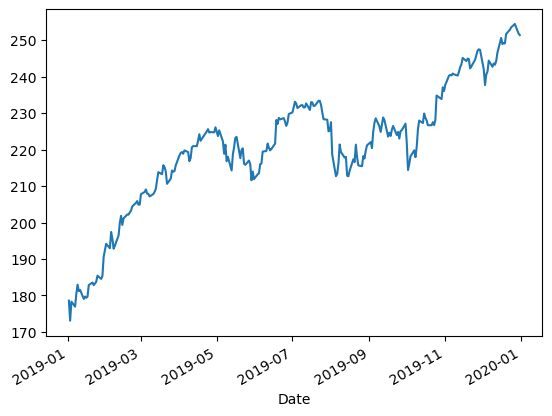

In [35]:
EW_day.plot()